<a href="https://colab.research.google.com/github/IvanGonzal0/Proyecto3_BigData_Clustering/blob/main/Proyecto3_BigData_IvanGonzaloTapia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 3 Machine Learning: Clustering 'Clasificador zonas según el peligro'**


## *Profesor: Ing. Valentín Barco*

## *Alumno: Iván Gonzalo Tapia*

## `Introducción`

En el laboratorio, nos centraremos en un conjunto de datos que incluye registros de
crímenes de 1973 en distintos estados de EE. UU., así como el porcentaje de la población
que reside en zonas urbanas en esos estados. El propósito es clasificar los estados en
diferentes categorías basadas en estos factores para determinar el nivel de inseguridad/peligrosidad.
## `Conjunto de datos`

Crímenes

● Asesinatos: La tasa de asesinatos, que se suele calcular como el número de
asesinatos por cada 100,000 habitantes en el estado.

● Asaltos: La tasa de asaltos, que también se calcula por cada 100,000 habitantes.
Esto incluiría casos de ataques violentos, incluyendo agresiones físicas.

● Población Urbana: El porcentaje de la población que vive en áreas urbanas del
estado. Un número más alto indica una mayor concentración de población en las
ciudades.

● Violaciónes: La tasa de violaciones, similarmente calculada por cada 100,000
habitantes. Representa la incidencia de este tipo de crimen en el estado
## `Tarea a desarrollar`

Se debe desarrollar un programa que permita clasificar los estados en diferentes categorías,
dividiéndolos en zonas de baja peligrosidad y alta peligrosidad. Este proyecto debe ser
ejecutado en un Notebook de Colab.
No es necesario aplicar múltiples modelos de clustering, ¡con aplicar uno de ellos está más
que bien!
Dentro del Notebook, es importante que cada paso del proceso esté acompañado por
bloques de texto que expliquen el razonamiento detrás de las decisiones tomadas. Se debe
detallar por qué se eligieron ciertas técnicas, métodos o parámetros y cuál es su relevancia
en el contexto del proyecto. Además, es necesario documentar los desafíos o
inconvenientes que surgieron durante el desarrollo, proporcionando una visión clara y
completa del proceso de diseño e implementación de la solución.


### 1 - Importación de librerias, carga y preprocesamiento de datos. Utilizando `Pandas NumPy SKLearn`

#### Inicio

En esta sección, se describen los pasos iniciales para el desarrollo del proyecto, que incluyen la importación de librerías, carga de datos, y preprocesamiento.

#### Librerías necesarias para el desarrollo del proyecto
Se importaron las siguientes librerías necesarias:

```python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MeanShift, DBSCAN

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import estimate_bandwidth
```

#### Carga de Datos

Se cargaron los datos desde un archivo CSV 'Crimenes.csv' y se creó un DataFrame a partir del mismo.

#### Selección de Variables de Entrada

Se seleccionaron las variables ('Asaltos', 'Asesinatos', 'Violaciones', y 'Poblacion Urbana')  para realizar el entrenamiento de modelos, ya que fue lo que consideramos más relevante para los modelos `KMeans & MeanShift`. Pero al modelo `DBSCAN` también lo entrenamos con los datos de la columna 'Estado' los cuales fueron procesados con `LabelEncoder`.

#### Procesamiento de Datos
Se utilizó la codificación de etiquetas `Label Encoding de SKLearn` para convertir las etiquetas de la columna'Estado' en números, este paso no era fundamentalmente necesario, pero se realizo para mantener buenas practicas para cuando creamos un modelo de Machine Learning ya que es algo entendible por el modelo.

In [ ]:
# Herramientas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Modelos
from sklearn.cluster import KMeans, MeanShift, DBSCAN
# Mediciones, análisis y procesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import estimate_bandwidth


In [ ]:
path = '/content/drive/MyDrive/UPSO ML & BD/DatasetClustering/Crimenes.csv'

##### El conjunto de datos se cargó desde un archivo CSV a un DataFrame utilizando la librería Pandas. Este paso nos permitió acceder y trabajar con la información de manera estructurada

In [ ]:
df = pd.read_csv(path)   #cargar el archivo csv en un df
df_crimenes = df.copy()  #copia del df original
df_crimenes.head()       #observamos un panorama de los datos

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


##### Codificación de variables categóricas:

Para poder incorporar la variable categórica 'Estado' en nuestros modelos, aplicamos una codificación numérica utilizando el método Label Encoding del módulo LabelEncoder de SKLearn. Este paso es fundamental, ya que la mayoría algoritmos de machine learning requieren variables numéricas para su procesamiento.

In [ ]:
# Crea una instancia del LabelEncoder
label_encoder = LabelEncoder()

# Aplica la codificación a la columna 'Estado'
df_crimenes['Estado'] = label_encoder.fit_transform(df_crimenes['Estado'])
df_crimenes.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6


 ##### Selección de características relevantes:

Identificamos y seleccionamos las características pertinentes para nuestro análisis. En este caso, nos enfocamos en las variables 'Asesinatos', 'Asaltos', 'Poblacion Urbana' y 'Violaciones', las cuales consideramos cruciales para nuestro modelo de machine learning.

In [ ]:
X = df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]  #seleccion de variables

### 2 - Visualizacion de datos con `Matplotlib y Seaborn`

#### En esta etapa del proyecto, nos enfocamos en explorar y visualizar el conjunto de datos a trabajar con el objetivo de obtener una comprensión inicial de las relaciones entre las diferentes características. Para ello, empleamos herramientas de visualización como seaborn y matplotlib para crear gráficos de dispersión entre pares de características. Este enfoque nos proporcionó una visión detallada de la distribución y relaciones entre las variables seleccionadas ('Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones').

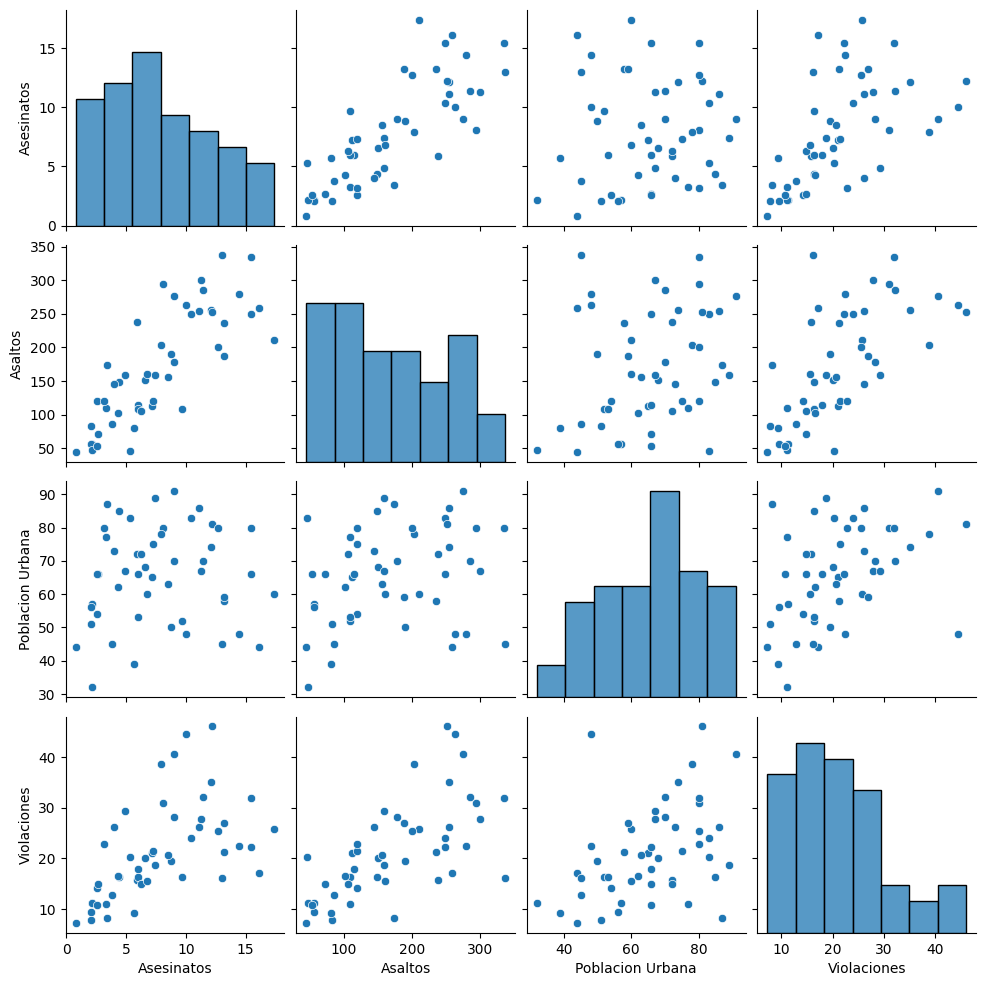

In [ ]:
sns.pairplot(X) #grafico con pairplot las variables con las que se va a entrenar el modelo
plt.show()

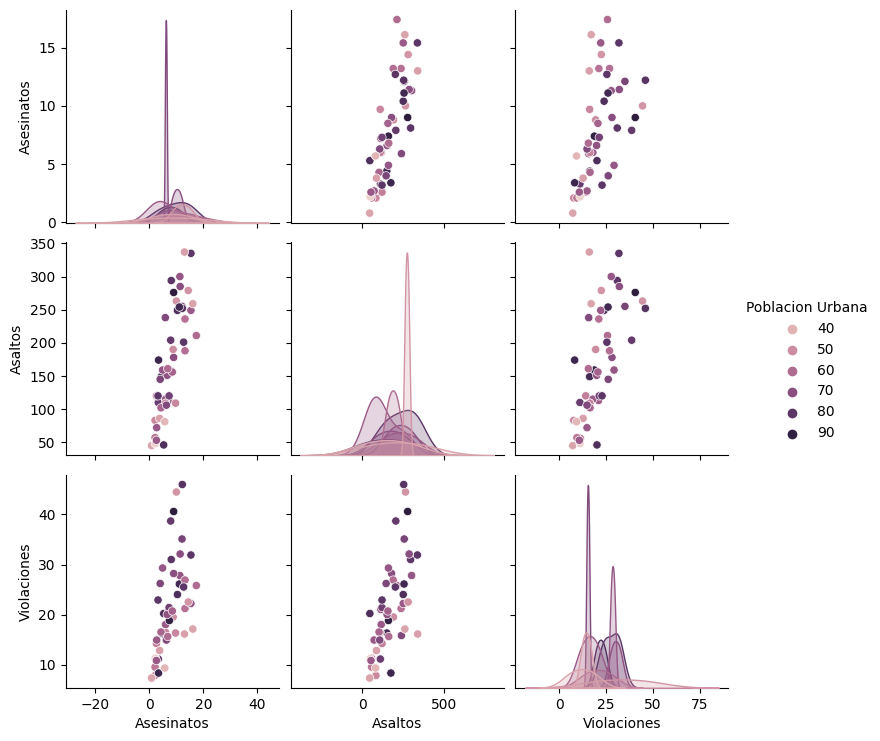

In [ ]:
sns.pairplot(X, hue='Poblacion Urbana')
plt.show()

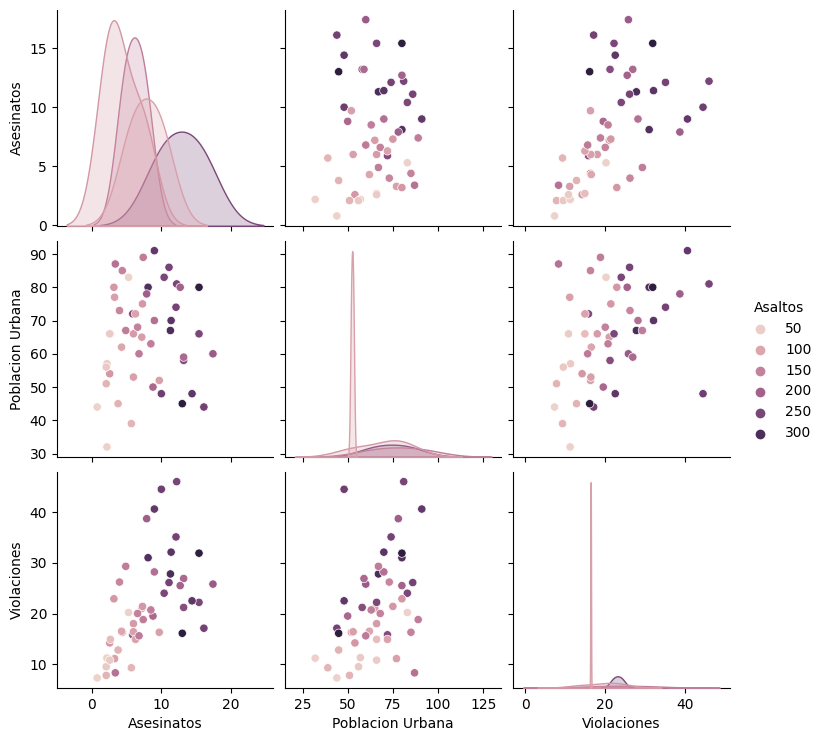

In [ ]:
sns.pairplot(X, hue='Asaltos')
plt.show()

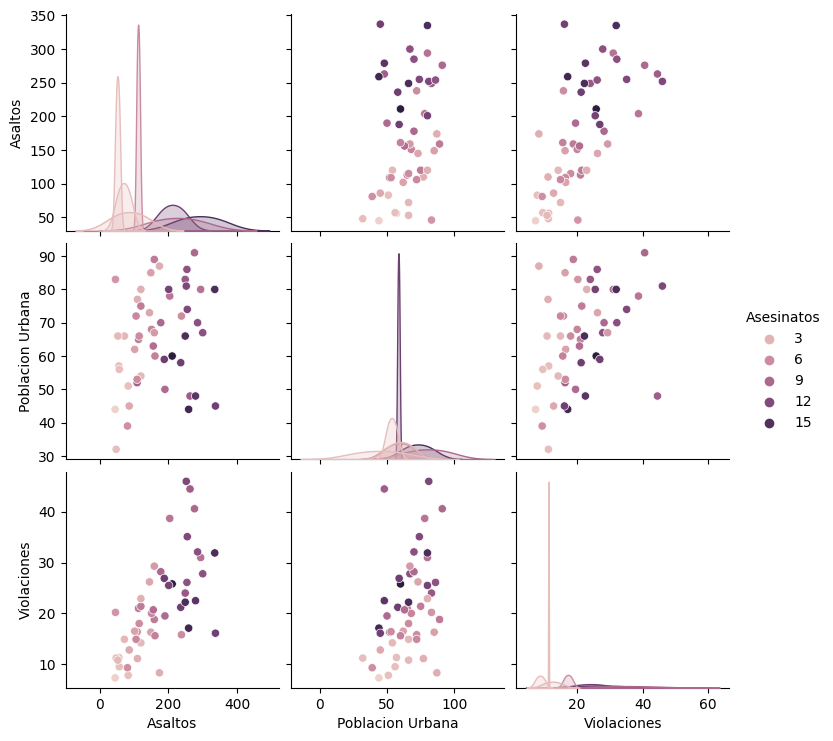

In [ ]:
sns.pairplot(X, hue='Asesinatos')
plt.show()

### 3 - Creación de Modelo `KMeans de SKLearn`

#### Se empleó el algoritmo `KMeans` del módulo `sklearn.cluster` para realizar agrupamientos en el conjunto de datos. Iteramos sobre un rango de posibles números de clusters (k) y calculamos la suma de errores cuadrados (SSE) para cada k. Los resultados se visualin en el siguiente gráfico, donde se observa la relación entre el número de clusters y la SSE. Este proceso nos permite identificar un punto en la curva donde la SSE comienza a estabilizarse, indicando el número óptimo de clusters.

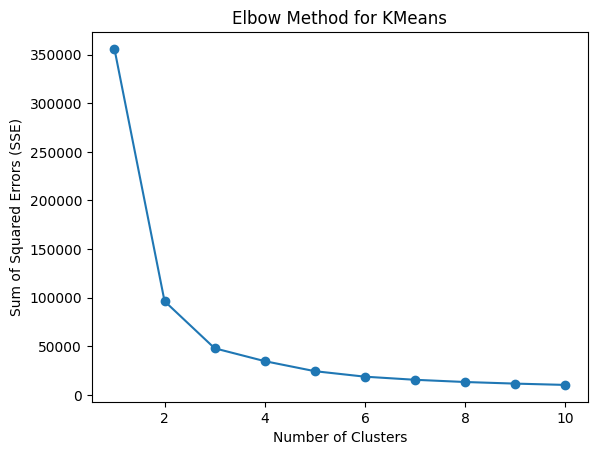

In [ ]:
def find_optimal_clusters_kmeans(data, max_k):
    sse = [] # Suma de los errores cuadrados
    for k in range(1, max_k+1): #iteracion del k en el rango de 1 a 10
        kmeans = KMeans(n_clusters=k, n_init=max_k).fit(data) #por cada k entrenamos el modelo
        sse.append(kmeans.inertia_)                           #agregamos el error cuadrado al array
    #graficamos la curva del codo
    plt.plot(range(1, max_k+1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Elbow Method for KMeans")
    plt.show()
#usamos la funcion para buscar el numero de clusters optimo para elmodelo KMeans
find_optimal_clusters_kmeans(X, 10)

#### Creamos una instancia del modelo `KMeans` de la librería `SKLearn`, especificando el número óptimo de clusters identificado anteriormente, que en este caso fue 3. La inicialización se llevó a cabo con una semilla aleatoria (random_state=42) para garantizar reproducibilidad.

In [ ]:
#creacion del modelo con K optimo
kmeans = KMeans(n_clusters=3, random_state=42)
#entrenamos el modelo y guardamos los resutados en la variable clusters
clusters = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# creamos un df para el modelo KMeans, al que le vamos a agregar los clusters obtenidos
df_crimenes_km = df.copy()
df_crimenes_km['clusters'] = clusters
df_crimenes_km.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clusters
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2


#### Etiquetado de Niveles de Seguridad:

Para facilitar la interpretación de los resultados, asignamos etiquetas descriptivas a cada cluster. En este caso, se utilizaron las etiquetas "Precaución," "Seguro," y "Peligroso" para representar los clusters 0, 1 y 2, respectivamente. Estas etiquetas se añadieron como una nueva columna llamada 'Nivel_Seguridad' al DataFrame.

In [ ]:
#diccionario para luego mapear las etiquetas, analizando y observando los graficos me di cuenta que el seguro era el 1,  precaucion el 0 y peligroso el 2
etiquetas = {0: 'Precaucion', 1: 'Seguro', 2: 'Peligroso'}
#creamos una nueva columna en el df de KMeans
df_crimenes_km['Nivel_Seguridad'] = df_crimenes_km['clusters'].map(etiquetas)
#dropeamos la columna clusters pq ya mapeamos los valores con su etiqueta correspondiente
df_crimenes_km = df_crimenes_km.drop('clusters', axis=1)
df_crimenes_km.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Nivel_Seguridad
0,Alabama,13.2,236,58,21.2,Peligroso
1,Alaska,10.0,263,48,44.5,Peligroso
2,Arizona,8.1,294,80,31.0,Peligroso
3,Arkansas,8.8,190,50,19.5,Precaucion
4,California,9.0,276,91,40.6,Peligroso


#### Visualización de los Resultados:

Creamos visualizaciones para entender y comunicar efectivamente los resultados del modelo `KMeans`. Utilizamos un gráfico de dispersión para representar la agrupación de datos en función de las características 'Asesinatos' y 'Asaltos', pudiéndose observar la relación entre estos (más asesinatos equivale a más asaltos). Se incluyeron los centroides de los clusters como puntos destacados en rojo para indicar los puntos centrales de cada grupo. Y luego creamos diferentes gráficos utilizando la función `pairplot`.

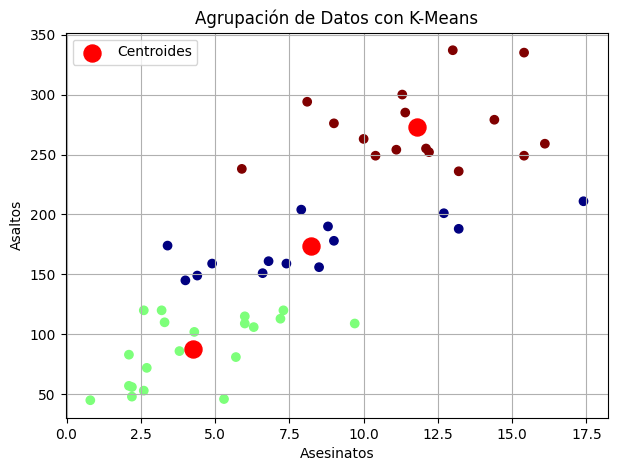

In [ ]:
#graficamos
plt.figure(figsize=(7, 5))
plt.scatter(X['Asesinatos'], X['Asaltos'], c = clusters, cmap = 'jet')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'red', marker = 'o', label = 'Centroides')

plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')
plt.title('Agrupación de Datos con K-Means')
plt.grid(True)
plt.legend()
plt.show()

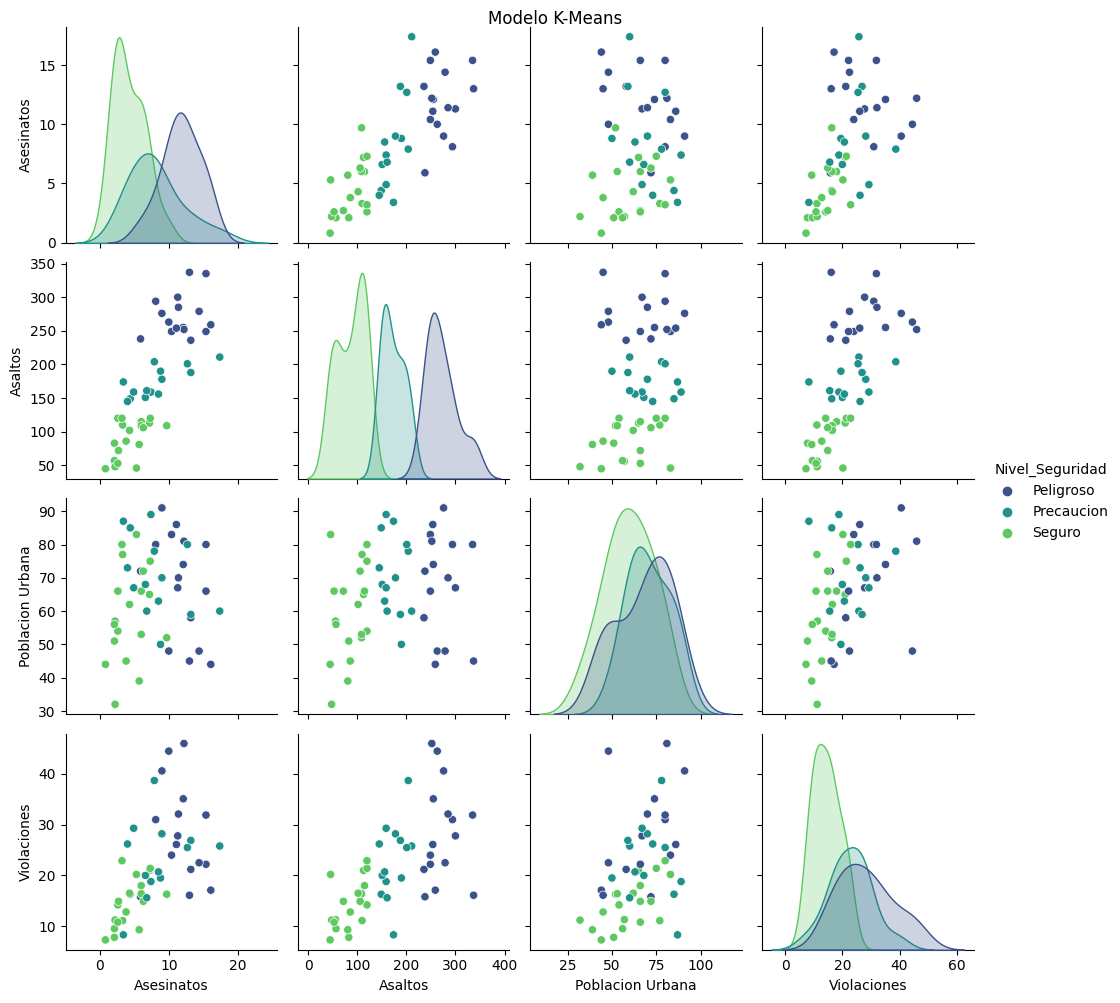

In [ ]:
#graficamos con pairplot
sns.pairplot(df_crimenes, hue='Nivel_Seguridad', palette='viridis')
plt.suptitle('Modelo K-Means', y=1)
plt.show()

### 4 - Creación de Modelo `Mean Shift de SKLearn`

#### Estimación del Ancho de Banda Óptimo:

Para aplicar el modelo `MeanShift` de manera efectiva, es crucial determinar el ancho de banda (bandwidth) óptimo. Empleamos la función `estimate_bandwidth` de `SKLearn`, variando el parámetro de cuantiles y evaluando la puntuación de silueta para cada configuración. El gráfico resultante nos permitió identificar el ancho de banda adecuado para nuestro conjunto de datos. En este caso, determinamos y comprobamos que un ancho de banda de 52 era óptimo para nuestro modelo.

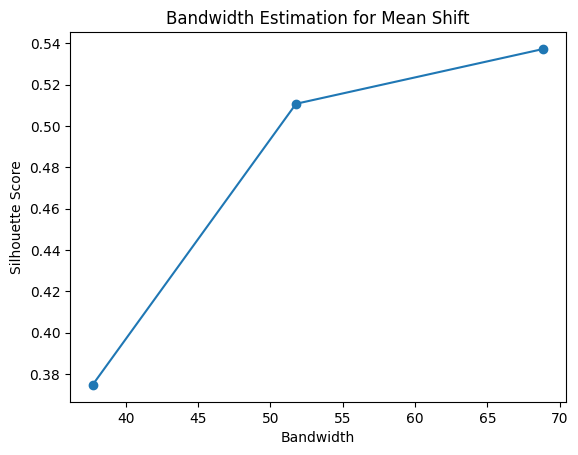

In [ ]:
#funcion para obtener el estimate bandwidth
def estimate_bandwidth_meanshift(data, quantile_range=(0.2, 0.5), step=0.1):
    bandwidths = []
    silhouettes = []

    quantiles = np.arange(quantile_range[0], quantile_range[1], step)

    for quantile in quantiles:
        bandwidth = estimate_bandwidth(data, quantile=quantile)
        bandwidths.append(bandwidth)

        ms = MeanShift(bandwidth=bandwidth).fit(data)
        if len(np.unique(ms.labels_)) > 1:
            sil_score = silhouette_score(data, ms.labels_)
            silhouettes.append(sil_score)
        else:
            silhouettes.append(-1)

    plt.plot(bandwidths, silhouettes, 'o-')
    plt.xlabel("Bandwidth")
    plt.ylabel("Silhouette Score")
    plt.title("Bandwidth Estimation for Mean Shift")
    plt.show()

estimate_bandwidth_meanshift(X)

#### Implementación del Modelo `MeanShift de SKLearn`:

Instanciamos y entrenamos el modelo `MeanShift` utilizando el ancho de banda óptimo identificado anteriormente.Visualizamos los resultados utilizando un gráfico de dispersión que representa la agrupación de datos en función de las características 'Asaltos' y 'Asesinatos'. Observándose que tenemos 3 grupos es decir tres clusters.

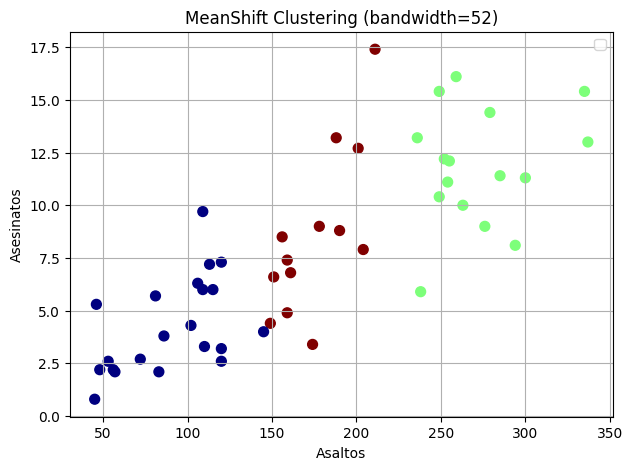

In [ ]:
# Aplicar MeanShift con bandwidth=1.6
bandwidth =52
ms = MeanShift(bandwidth=bandwidth).fit(X)
labels = ms.labels_

# Graficar los resultados
plt.figure(figsize=(7, 5))
plt.scatter(X['Asaltos'], X['Asesinatos'], c=labels, s=50, cmap='jet')
plt.title(f'MeanShift Clustering (bandwidth={bandwidth})')
plt.xlabel("Asaltos")
plt.ylabel("Asesinatos")
plt.legend()
plt.grid(True)
plt.show()

#### Análisis Adicional con `Pairplot`:

Generamos un `pairplot` que muestra relaciones entre las características para comprender mejor la distribución de datos en los tres clusters identificados por el modelo Mean Shift. Este análisis visual es esencial para evaluar la eficacia del modelo y proporciona información útil para interpretar los resultados.

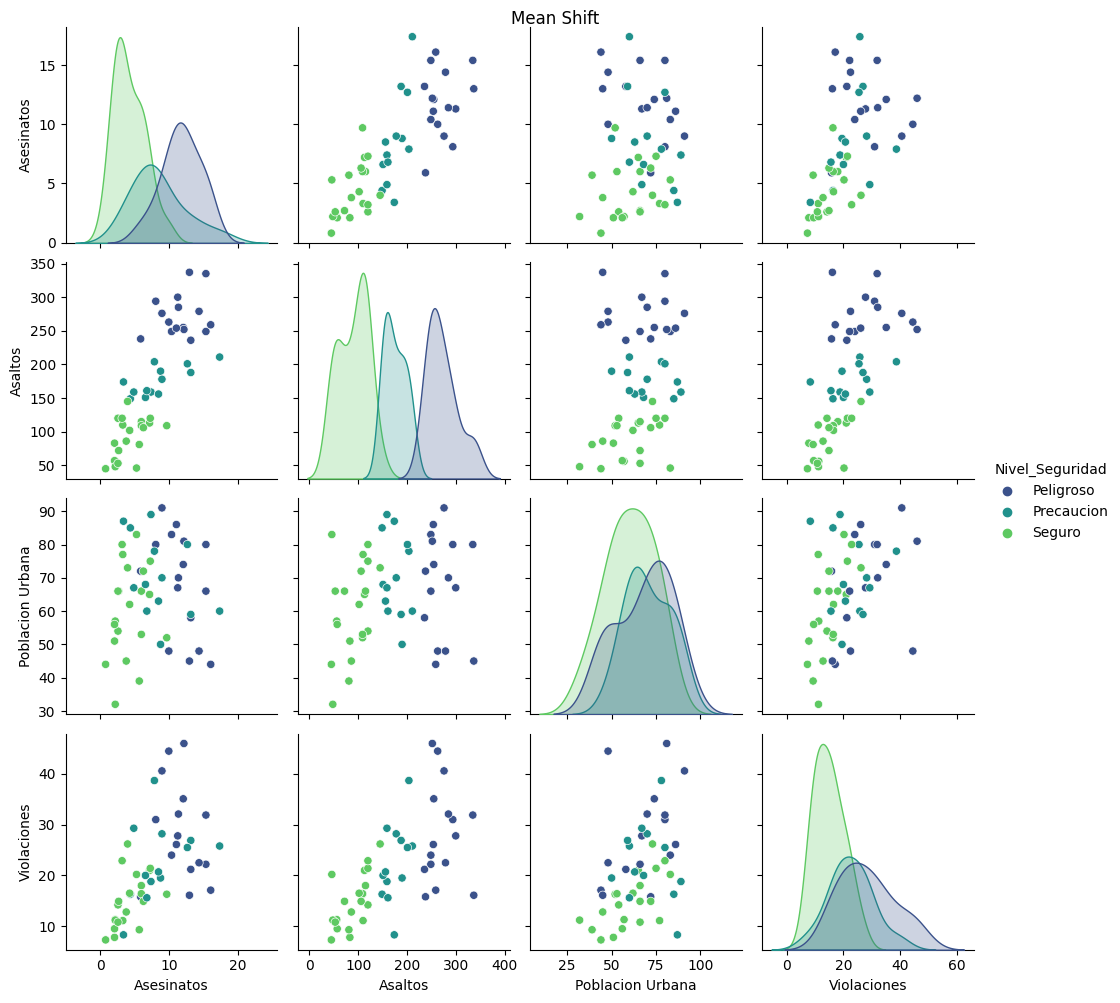

In [ ]:
#creamos un df para el modelo MS
df_crimenes_ms = X.copy()
#agregamos los resultados obtenidos al df de MS
df_crimenes_ms['clusters'] = labels
#etiquetas para mapear con los clusters y que no sean numeros
etiquetas = {0: 'Seguro', 1: 'Peligroso', 2: 'Precaucion'}

#mapeamos las etiquetas y despues dropeamos la columna clusters pq seria informacion rebundante
df_crimenes_ms['Nivel_Seguridad'] = df_crimenes_ms['clusters'].map(etiquetas)
df_crimenes_ms = df_crimenes_ms.drop('clusters', axis=1)
#graficamos con pairplot
sns.pairplot(df_crimenes_ms, hue='Nivel_Seguridad', palette='viridis')
plt.suptitle('Mean Shift', y=1)
plt.show()

### 5 - Creacion de Modelo `DBSCAN de SKLearn`

In [ ]:
#hacemos un df para el modelo DBSCAN
df_crimenes_db = df_crimenes.copy()

In [ ]:
df_crimenes_db.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6


#### Identificación del Parámetro Óptimo EPS:

Antes de aplicar `DBSCAN`, es esencial determinar el valor óptimo del parámetro EPS, que representa la distancia máxima entre dos muestras para ser consideradas en el mismo vecindario. Desarrollamos una función `find_optimal_eps_dbscan` para encontrar este valor mediante la observación de las distancias al vecino más cercano. El gráfico resultante nos proporcionó información relevante para la configuración de `DBSCAN`.

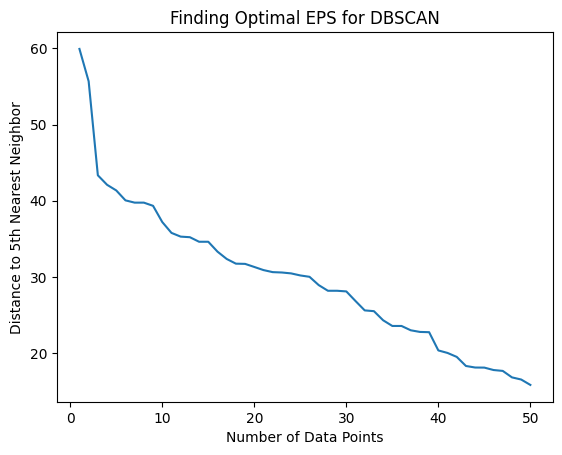

In [ ]:
#funcion para buscar y observar el EPS optimo
def find_optimal_eps_dbscan(data, min_samples=5):
    nn = NearestNeighbors(n_neighbors=min_samples)
    nbrs = nn.fit(data)
    distances, indices = nbrs.kneighbors(data)

    # Ordena las distancias y plotea
    distanceDec = sorted(distances[:, min_samples-1], reverse=True)
    plt.plot(list(range(1, len(distanceDec) + 1)), distanceDec)
    plt.xlabel("Number of Data Points")
    plt.ylabel("Distance to " + str(min_samples) + "th Nearest Neighbor")
    plt.title("Finding Optimal EPS for DBSCAN")
    plt.show()

# Ejemplo:
find_optimal_eps_dbscan(df_crimenes_db)

#### Aplicación del Modelo `DBSCAN`:

Ajustamos el modelo `DBSCAN` utilizando el valor de EPS identificado en la sección anterior. El resultado fue un conjunto de etiquetas de cluster, donde el valor -1 indica puntos considerados como ruido o atípicos. Visualizamos los resultados mediante un gráfico de dispersión que representa los datos en función de las características 'Asaltos' y 'Asesinatos', coloreando cada punto según el cluster asignado por el modelo.

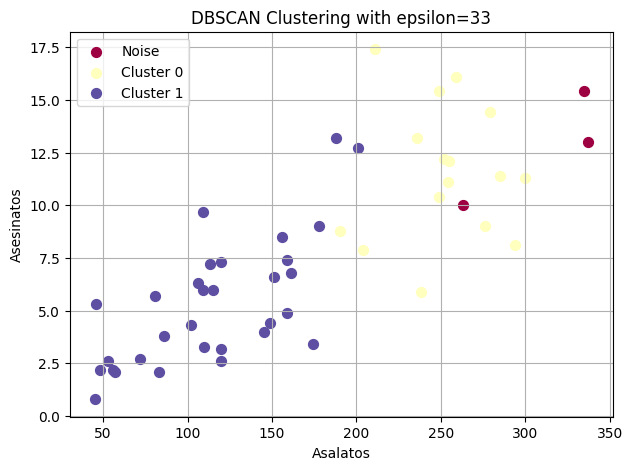

In [ ]:
# Ajusta DBSCAN
db = DBSCAN(eps=35, min_samples=5).fit(df_crimenes_db)

#guardamos los valores de los clusters
labels = db.labels_

#graaficamos los resultados
plt.figure(figsize=(7, 5))
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = df_crimenes_db[class_member_mask]
    plt.scatter(xy['Asaltos'], xy['Asesinatos'], s=50, color=color, label='Cluster {}'.format(label) if label != -1 else 'Noise')

plt.title('DBSCAN Clustering with epsilon=33')
plt.xlabel("Asalatos")
plt.ylabel("Asesinatos")
plt.grid(True)
plt.legend()
plt.show()

#### Categorización y Análisis Adicional:

Categorizamos los clusters asignando etiquetas descriptivas, como 'Peligro' y 'Seguro', y clasificamos los puntos no asignados como 'Indefinido'. Luego, generamos un pairplot para visualizar las relaciones bivariadas entre las características, coloreadas según las categorías definidas. Este análisis reveló dos grupos claramente distinguibles que representan los niveles de seguridad 'Peligro' y 'Seguro'. Además, identificamos un pequeño número de datos indefinidos que no se asignaron claramente a ningún cluster.

In [ ]:
#agregamos la columna clusters al df de DBSCAN
df_crimenes_db['clusters'] = labels

In [ ]:
df_crimenes_db.head(20)

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clusters
0,0,13.2,236,58,21.2,0
1,1,10.0,263,48,44.5,-1
2,2,8.1,294,80,31.0,0
3,3,8.8,190,50,19.5,0
4,4,9.0,276,91,40.6,0
5,5,7.9,204,78,38.7,0
6,6,3.3,110,77,11.1,1
7,7,5.9,238,72,15.8,0
8,8,15.4,335,80,31.9,-1
9,9,17.4,211,60,25.8,0


In [ ]:
#creamos las etiquetas necesarias para mapearlas en una nueva columna, en este caso tenemos 2 clusters, lo pudimos observar en el grafico de resultados
etiquetas = {0: 'Peligro', 1: 'Seguro', -1: 'Indefinido'}
#columna nueva con los niveles de seguridad, y dropeamos la columna cluster que tiene los valores en numeros
df_crimenes_db['Nivel_Seguridad'] = df_crimenes_db['clusters'].map(etiquetas)
df_crimenes_db = df_crimenes_db.drop('clusters', axis=1)

df_crimenes_db.head()

,Estado,Asesinatos,Asaltos,Violaciones,Nivel_Seguridad
0,0,13.2,236,21.2,Peligro
1,1,10.0,263,44.5,Indefinido
2,2,8.1,294,31.0,Peligro
3,3,8.8,190,19.5,Peligro
4,4,9.0,276,40.6,Peligro


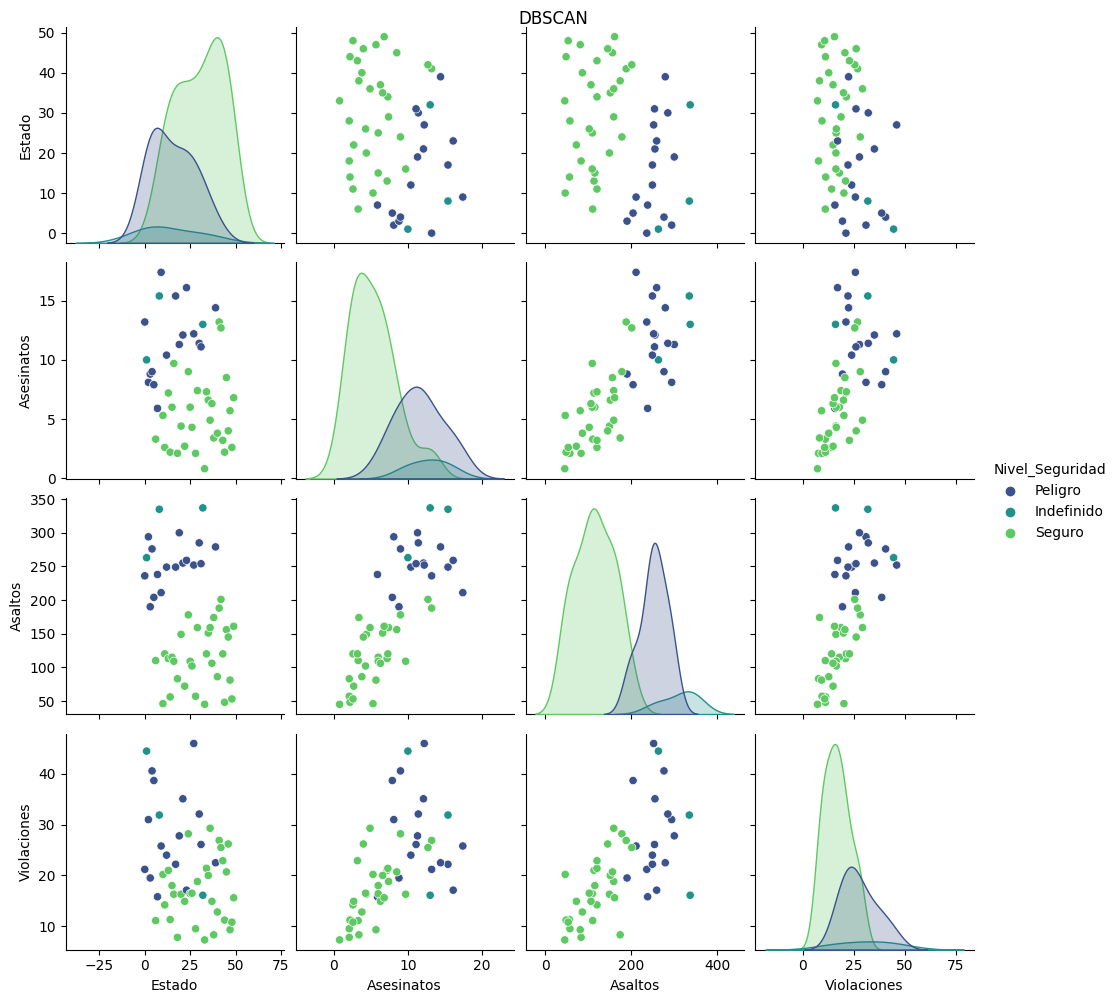

In [ ]:
#grafico con pairplot
sns.pairplot(df_crimenes_db, hue='Nivel_Seguridad', palette='viridis')
plt.suptitle('DBSCAN', y=1)
plt.show()